In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

### Load the dataset

This dataset contain the information of an animal called possum. We will try to use the features to predict its age

In [7]:
dataset = pd.read_csv('data/possum.csv')
dataset.dropna(inplace=True)

In [8]:
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [9]:
dataset['Pop'].value_counts(), dataset['sex'].value_counts()

(Pop
 other    58
 Vic      43
 Name: count, dtype: int64,
 sex
 m    59
 f    42
 Name: count, dtype: int64)

### Create a training and testing dataset

In [10]:
X = dataset[['Pop','sex','skullw','taill','chest','belly']]
y = dataset['age']

age = w1*pop + w2*sex + w3*skullw + ... + belly

### Converting categorical to numerical value

In [11]:
X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})
X['sex'] = X['sex'].map({'m': 0, 'f': 1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_24708\3220500383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})
C:\Users\Admin\AppData\Local\Temp\ipykernel_24708\3220500383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'m': 0, 'f': 1})


### Split the training and testing dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

### Scaling the dataset to N(0,1)
Only fit the training dataset

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
scaler.mean_

array([ 0.5875,  0.425 , 56.765 , 37.025 , 27.0125, 32.7   ])

In [16]:
scaler.var_

array([0.24234375, 0.244375  , 6.288025  , 4.224375  , 3.04984375,
       7.185     ])

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the dataset

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_hat = linear_model.predict(X_test)

In [20]:
mean_squared_error(y_test, y_hat)

5.442108697829392

### Polynomial Regression

In [21]:
def f(x):
    return pow(x,3) + 2*x*x +1

In [22]:
nums = np.arange(-10,10)
y = np.array([f(x) for x in nums])

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(nums, y, color='red')

y = ax^3 + bx^2 + cx + d \
age = w1*pop + w2*sex + w3*skullw + ... + b

In [30]:
arr = np.arange(-10,10)

In [40]:
a = [x**3 for x in arr]
b = [x**2 for x in arr]
c = [x for x in arr]
d = [1 for x in arr]

In [41]:
X = pd.DataFrame({'a':a, 'b':b, 'c': c, 'd':d})

In [42]:
X

,a1,a2,a,b,c,d
0,-100000,10000,-1000,100,-10,1
1,-59049,6561,-729,81,-9,1
2,-32768,4096,-512,64,-8,1
3,-16807,2401,-343,49,-7,1
4,-7776,1296,-216,36,-6,1
5,-3125,625,-125,25,-5,1
6,-1024,256,-64,16,-4,1
7,-243,81,-27,9,-3,1
8,-32,16,-8,4,-2,1
9,-1,1,-1,1,-1,1


In [43]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [36]:
lr.coef_

array([ 1.00000000e+00,  2.00000000e+00, -3.99680289e-15,  0.00000000e+00])

In [38]:
lr.intercept_

1.000000000000039

In [ ]:
a= 1
b = 2
c = 0
d = 0

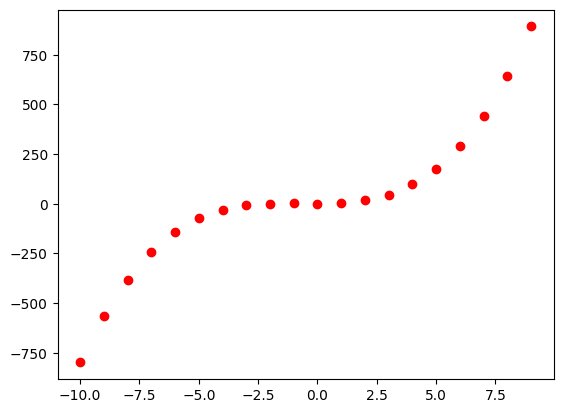

In [39]:
arr2 = np.arange(-10,10)
a = [x**3 for x in arr2]
b = [x**2 for x in arr2]
c = [x for x in arr2]
d = [1 for x in arr2]
X = pd.DataFrame({'a':a, 'b':b, 'c': c, 'd':d})

y_pred = lr.predict(X)
plt.scatter(arr2, y, color='red')